<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/eat_tensorflow2_in_30_days/Chapter3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-3 High-level API: Demonstration

The examples below use high-level APIs in TensorFlow to implement a linear regression model and a DNN binary classification model.

Typically, the high-level APIs are providing the class interfaces for `tf.keras.models`.

There are three way of modeling using APIs of keras:
1. sequential modeling using `Sequential` function.
2. arbitary modeling using API functions.
3. customized modeling by inheriting base class `Model`.

Here the demonstrating using `Sequential` function and customized modeling by inheriting base class `Model`, respectively

In [1]:
import tensorflow as tf

# Time stamp
@tf.function
def printbar():
  today_ts = tf.timestamp()%(24*60*60)

  hour = tf.cast(today_ts//3600+8, tf.int32)%tf.constant(24)
  minute = tf.cast((today_ts%3600)//60, tf.int32)
  second = tf.cast(tf.floor(today_ts%60), tf.int32)

  def timeformat(m):
    if tf.strings.length(tf.strings.format("{}", m)) == 1:
      return(tf.strings.format("0{}", m))
    else:
      return(tf.strings.format("{}", m))

  timestring = tf.strings.join([timeformat(hour), timeformat(minute),
      timeformat(second)], separator = ":")

  tf.print("=========="* 8 + timestring)

## 1. Linear Regression Model

The `Sequential` function to construct the model sequentially and use the pre-defined method `model.fit` for training (for the beginners)

### (a) Data Preparation

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, metrics, losses

In [3]:
# Number of sample
n = 400

In [7]:
# Generate the datasets
X = tf.random.uniform([n, 2], minval=-10, maxval=10)
w0 = tf.constant([[2.0], [-3.0]])
b0 = tf.constant(3.0)
Y = X@w0 + b0 + tf.random.normal([n, 1], mean=0.0, stddev=2.0)

Text(0, 0.5, 'y')

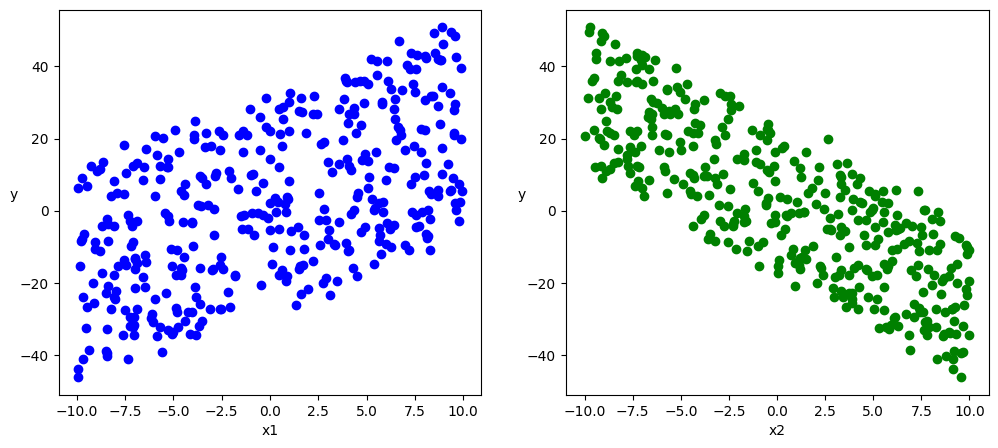

In [8]:
# Data visualization
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c='b', marker='o')
ax1.set_xlabel('x1')
ax1.set_ylabel('y', rotation=0)

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c='g', marker='o')
ax2.set_xlabel('x2')
ax2.set_ylabel('y', rotation=0)

### (b) Model Definition

In [10]:
tf.keras.backend.clear_session()

# Linear regression model
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(2,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (c) Model Training

In [11]:
# Training using method fit
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X, Y, epochs=200, batch_size=10)

tf.print('w = ', model.layers[0].kernel)
tf.print('b = ', model.layers[0].bias)

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 453.9643 - mae: 17.6556
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 441.6310 - mae: 17.4185
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 429.4348 - mae: 17.1799
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 417.5756 - mae: 16.9436
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 405.9732 - mae: 16.7102
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 394.6275 - mae: 16.4765
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 383.4893 - mae: 16.2460
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 372.6571 - mae: 16.0143
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 361.9566 - mae: 15.7891
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 351.6906 - mae: 15.5663
Epoch 11/200
40/40 [=========

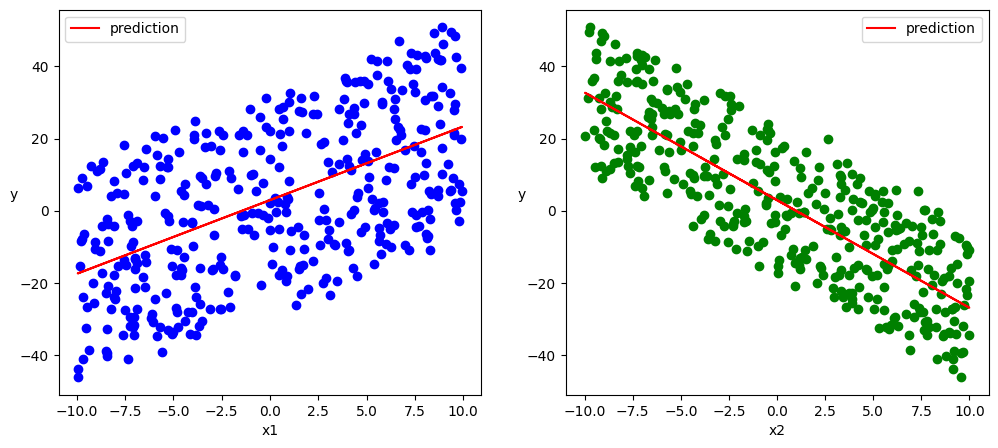

In [15]:
# Visualize the results
w, b = model.variables

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c='b', marker='o')
ax1.plot(X[:, 0], w[0] * X[:, 0] + b[0], color='r', label='prediction')
ax1.legend()
ax1.set_xlabel('x1')
ax1.set_ylabel('y', rotation=0)

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c='g', marker='o')
ax2.plot(X[:, 1], w[1] * X[:, 1] + b[0], color='r', label='prediction')
ax2.legend()
ax2.set_xlabel('x2')
ax2.set_ylabel('y', rotation=0)

plt.show()

## 2. DNN Binary Classification Model

Here example of customized model using the child class that inherited from the base class `Model`, and use a customized loop for training (for the expert)

### (a) Data Preparation

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, losses, metrics, optimizers

In [31]:
# Number of positive & negative samples
n_positive, n_negative = 2000, 2000

In [32]:
# Generate positive samples with a distribution on a smaller ring
r_p = 5.0 + tf.random.truncated_normal([n_positive, 1], 0.0, 1.0)
theta_p = tf.random.uniform([n_positive, 1], 0.0, 2.0*np.pi)
Xp = tf.concat([r_p * tf.cos(theta_p), r_p * tf.sin(theta_p)], axis=1)
Yp = tf.ones_like(r_p)

In [33]:
# Generate negative samples with a distribution on a larger ring
r_n = 8.0 + tf.random.truncated_normal([n_negative, 1], 0.0, 1.0)
theta_n = tf.random.uniform([n_negative, 1], 0.0, 2.0*np.pi)
Xn = tf.concat([r_n * tf.cos(theta_n), r_n * tf.sin(theta_n)], axis=1)
Yn = tf.zeros_like(r_n)

In [34]:
# Assembling all samples
X = tf.concat([Xp, Xn], axis=0)
Y = tf.concat([Yp, Yn], axis=0)

In [35]:
# Shuffling the samples
data = tf.concat([X, Y], axis=1)
data = tf.random.shuffle(data)
X = data[:, :2]
Y = data[:, 2:]

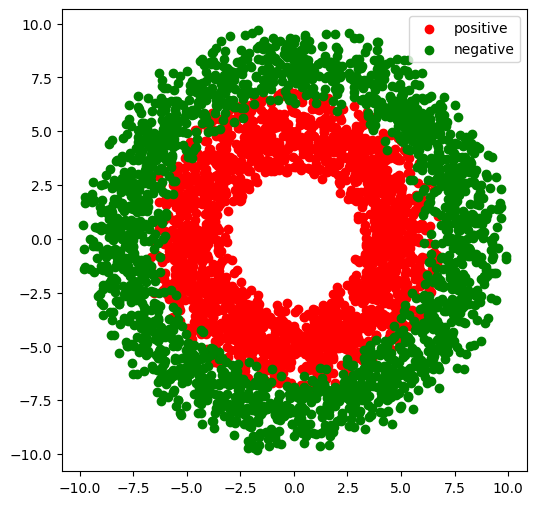

In [36]:
# Visualize the data
plt.figure(figsize=(6, 6))
plt.scatter(Xp[:, 0].numpy(), Xp[:, 1].numpy(), c='r', marker='o', label='positive')
plt.scatter(Xn[:, 0].numpy(), Xn[:, 1].numpy(), c='g', marker='o', label='negative')
plt.legend()

In [37]:
ds_train = tf.data.Dataset.from_tensor_slices((X[0:n*3//4, :], Y[0:n*3//4, :])) \
            .shuffle(buffer_size=1000).batch(32) \
            .prefetch(tf.data.experimental.AUTOTUNE) \
            .cache()

ds_valid = tf.data.Dataset.from_tensor_slices((X[n*3//4:, :], Y[n*3//4:, :])) \
            .batch(32) \
            .prefetch(tf.data.experimental.AUTOTUNE) \
            .cache()

### (b) Model Definition

In [40]:
from os import access
tf.keras.backend.clear_session()

# DNN model
class DNNModel(models.Model):
  def __init__(self):
    super(DNNModel, self).__init__()

  def build(self, input_shape):
    self.dense1 = layers.Dense(4, activation='relu', name='dense1')
    self.dense2 = layers.Dense(8, activation='relu', name='dense2')
    self.dense3 = layers.Dense(1, activation='sigmoid', name='dense3')
    super(DNNModel, self).build(input_shape)

  # Forward propagation
  @tf.function(input_signature=[tf.TensorSpec(shape=[None, 2], dtype=tf.float32)])
  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    y = self.dense3(x)
    return y

model = DNNModel()
model.build(input_shape=(None, 2))
model.summary()

Model: "dnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  12        
                                                                 
 dense2 (Dense)              multiple                  40        
                                                                 
 dense3 (Dense)              multiple                  9         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (c) Model Training

In [41]:
optimizer = optimizers.Adam(learning_rate=0.01)
loss_func = losses.BinaryCrossentropy()

In [42]:
train_loss = metrics.Mean(name='train_loss')
train_metric = metrics.BinaryAccuracy(name='train_accuracy')

valid_loss = metrics.Mean(name='valid_loss')
valid_metric = metrics.BinaryAccuracy(name='valid_accuracy')

In [43]:
# Customize the training loop
@tf.function
def train_step(model, features, labels):
  with tf.GradientTape() as tape:
    predictions = model(features)
    loss = loss_func(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss.update_state(loss)
  train_metric.update_state(labels, predictions)

In [44]:
@tf.function
def valid_step(model, features, labels):
  predictions = model(features)
  batch_loss = loss_func(labels, predictions)
  valid_loss.update_state(batch_loss)
  valid_metric.update_state(labels, predictions)

In [45]:
def train_model(model, ds_train, ds_valid, epochs):
  for epoch in tf.range(1, epochs+1):
    for features, labels in ds_train:
      train_step(model, features, labels)

    for features, labels in ds_valid:
      valid_step(model, features, labels)

    logs = 'Epoch={}, Loss:{}, Accuracy:{}, Valid Loss:{}, Valid Accuracy:{}'

    if epoch%100 == 0:
      printbar()
      tf.print(tf.strings.format(logs, (epoch, train_loss.result(), train_metric.result(), valid_loss.result(), valid_metric.result())))

    train_loss.reset_states()
    valid_loss.reset_states()
    train_metric.reset_states()
    valid_metric.reset_states()

In [46]:
train_model(model, ds_train, ds_valid, 1000)

================================================================================12:01:11
Epoch=100, Loss:0.107680582, Accuracy:0.966666639, Valid Loss:0.142875388, Valid Accuracy:0.938648641
================================================================================12:01:28
Epoch=200, Loss:0.0905119926, Accuracy:0.963333309, Valid Loss:0.133300886, Valid Accuracy:0.942432404
================================================================================12:01:45
Epoch=300, Loss:0.0862546191, Accuracy:0.963333309, Valid Loss:0.134337574, Valid Accuracy:0.942432404
================================================================================12:02:03
Epoch=400, Loss:0.0847306326, Accuracy:0.963333309, Valid Loss:0.136607692, Valid Accuracy:0.942162156
================================================================================12:02:19
Epoch=500, Loss:0.08396402, Accuracy:0.963333309, Valid Loss:0.139095038, Valid Accuracy:0.941621602
===========================================

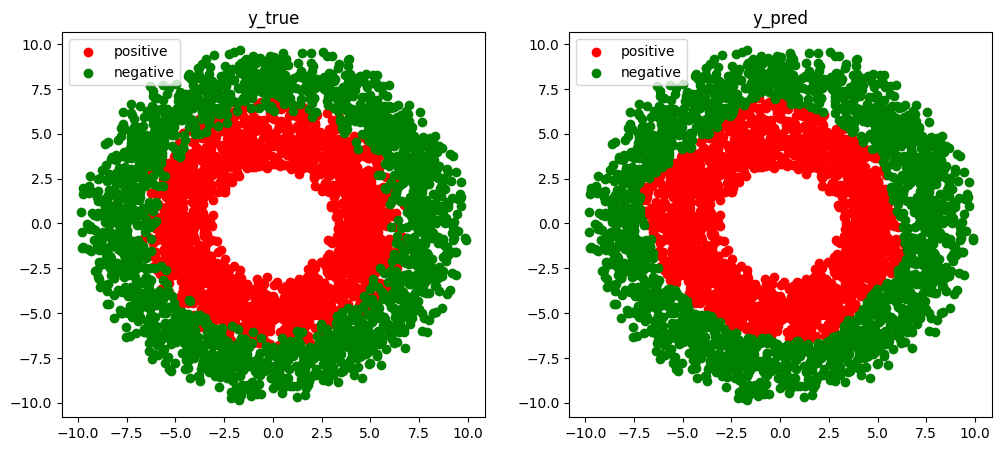

In [47]:
# Visualize the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(Xp[:, 0].numpy(), Xp[:, -1].numpy(), c='r', marker='o', label='positive')
ax1.scatter(Xn[:, 0].numpy(), Xn[:, -1].numpy(), c='g', marker='o', label='negative')
ax1.legend()
ax1.set_title('y_true')

Xp_pred = tf.boolean_mask(X, tf.squeeze(model(X) >= 0.5, axis=1))
Xn_pred = tf.boolean_mask(X, tf.squeeze(model(X) < 0.5, axis=1))

ax2.scatter(Xp_pred[:, 0].numpy(), Xp_pred[:, -1].numpy(), c='r', marker='o', label='positive')
ax2.scatter(Xn_pred[:, 0].numpy(), Xn_pred[:, -1].numpy(), c='g', marker='o', label='negative')
ax2.legend()
ax2.set_title('y_pred')

plt.show()